<a href="https://colab.research.google.com/github/Fnriquel/281-Project/blob/main/Efficiennet_Colabversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import charset_normalizer
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [5]:
import itertools
import PIL as pillow
from PIL import Image
import scipy


In [6]:
img_size = (224, 224)
input_shape = (224,224,3)
base_model = EfficientNetB3(input_shape=input_shape, include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)


43941136/43941136 [==============================] - 0s 0us/step


In [12]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
img_size = (224, 224)
color_mode = 'rgb'
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/W281/Original',
    target_size=img_size,
    color_mode=color_mode,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/W281/Original',
    target_size=img_size,
    color_mode=color_mode,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2420 images belonging to 4 classes.
Found 603 images belonging to 4 classes.


In [13]:
model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
76/76 [==============================] - 28s 223ms/step - loss: 1.2903 - accuracy: 0.4169 - val_loss: 1.3277 - val_accuracy: 0.3599
Epoch 2/10
76/76 [==============================] - 15s 192ms/step - loss: 1.2726 - accuracy: 0.4326 - val_loss: 1.3421 - val_accuracy: 0.3383
Epoch 3/10
76/76 [==============================] - 12s 163ms/step - loss: 1.2758 - accuracy: 0.4289 - val_loss: 1.3764 - val_accuracy: 0.2670
Epoch 4/10
76/76 [==============================] - 12s 160ms/step - loss: 1.2558 - accuracy: 0.4256 - val_loss: 1.3575 - val_accuracy: 0.3002
Epoch 5/10
76/76 [==============================] - 12s 161ms/step - loss: 1.2408 - accuracy: 0.4512 - val_loss: 1.4224 - val_accuracy: 0.2670
Epoch 6/10
76/76 [==============================] - 12s 163ms/step - loss: 1.2269 - accuracy: 0.4591 - val_loss: 1.3530 - val_accuracy: 0.3284
Epoch 7/10
76/76 [==============================] - 13s 165ms/step - loss: 1.2303 - accuracy: 0.4504 - val_loss: 1.4216 - val_accuracy: 0.2637

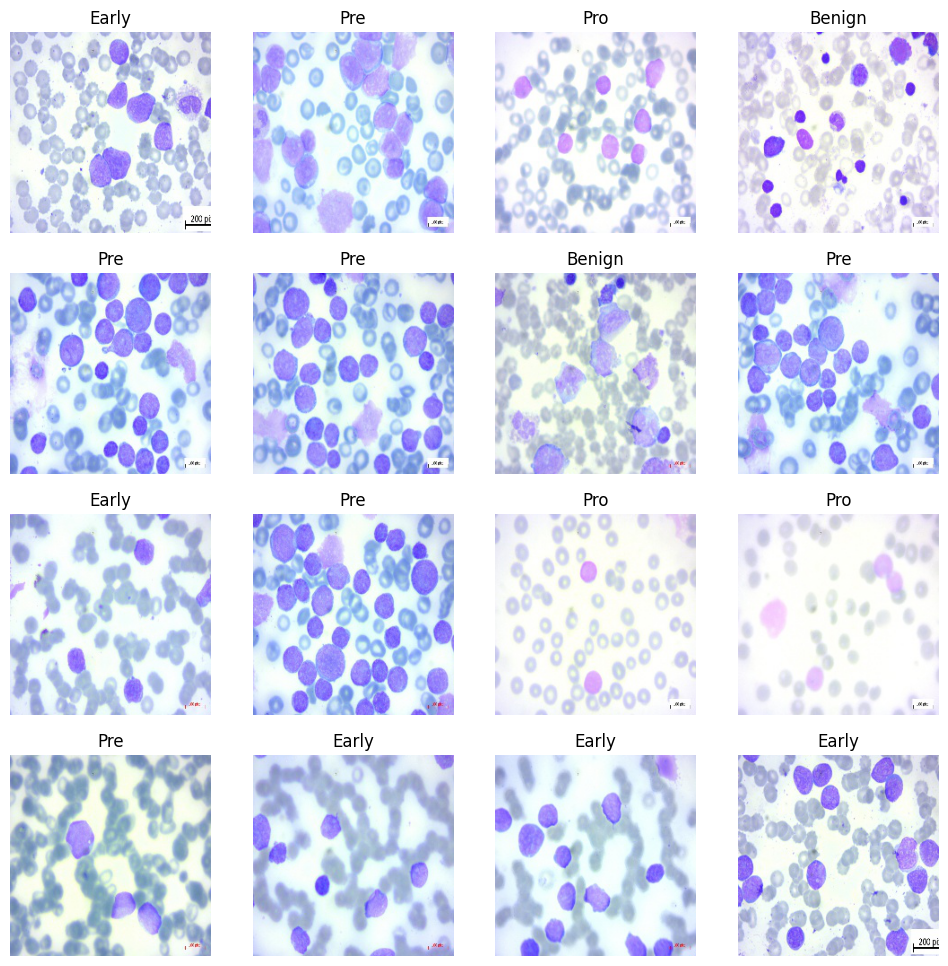

In [ ]:
dls.show_batch(max_n=16)